# Libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
from urad_Preprocessing import get_data_preprocessing
time_prediction = 7

Using TensorFlow backend.


Prepare the dataset

In [2]:
np.random.seed(5) #set pseudo checkpoint
get_data_preprocessing()
dataset = pd.read_csv("fb_ads_preprocess.csv", header=None)
dataset = dataset.iloc[:,-1]
len_dataset = len(dataset)

Files from the folder-fb ads/ that contains-22 files are succesfully loaded...
(510, 14)
Preprocessing is successful!


# Function List ("Data splitting (training and testing)", "ANN", "LSTM", "dataset converter")

In [3]:
# convert an array of values into a dataset matrix
def convert_cpc(dataset, time_prediction=7):
    # look back default value is in day, it is equal to one week
    dataX, dataY = [], []
    for i in range(len(dataset)-time_prediction+1):
        a = dataset[i:i+time_prediction-1]
        dataX.append(a)
        dataY.append(dataset[i + time_prediction-1])
    return np.array(dataX), np.array(dataY)

In [4]:
#Divide the data into training, and test data
def divide_data(dataset, time_prediction):
    datasetX, datasetY= convert_cpc(dataset, time_prediction)
    #prepare the dataset, and divide them into training and testing dataset
    train_size = int(len_dataset * 0.8)
    test_size = len_dataset - train_size
    trainX, trainY, testX, testY =  datasetX[:train_size], datasetY[:train_size], \
                                    datasetX[train_size:], datasetY[train_size:]
    print (datasetX.shape, trainX.shape, testX.shape, len_dataset)
    return trainX, trainY, testX, testY

In [14]:
#Make the data into classification problem (up and down)
def subtract(x1, x0):
    return (x1 - x0) > 0

def regression_to_class(inp):
    len_input = len(inp)
    output = np.zeros_like(inp)
    for i in range(1,len_input): output[i] = subtract(inp[i], inp[i-1])
    return output 

In [6]:
#build an ANN model
batch_size = 256
trainX, trainY, testX, testY = divide_data(dataset, time_prediction)
def build_model(optimizer_value, time_prediction, hidden_layer=1):
    forecast_model = Sequential()
    forecast_model.add(Dense(units = time_prediction*(2**(hidden_layer+1)), kernel_initializer = "uniform", 
                             activation = "relu", input_dim = time_prediction-1))
    forecast_model.add(Dropout(0.4))
    for i in range(hidden_layer - 1):
        forecast_model.add(Dense(units = time_prediction*(2**(hidden_layer-i)), 
                                 kernel_initializer = "uniform",
                                 activation = "relu"))
        forecast_model.add(Dropout(0.4))
    forecast_model.add(Dense(units = 1))
    adam = Adam(decay = optimizer_value*0.1, lr=optimizer_value)
    forecast_model.compile(loss="mean_squared_error", optimizer = adam)
    return forecast_model

(504, 6) (408, 6) (96, 6) 510


# Validation

In [ ]:
#using the training data that will be divided again into 80% train, and 20% validation
model = build_model(0.0001, time_prediction, 1)
history = model.fit(trainX, trainY, epochs=1000, batch_size=batch_size, validation_split=0.2, shuffle=True)

In [ ]:
#plot training and validation loss using MSE 
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN: model missing accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((.0,0.1))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction

In [7]:
#build the model and predict the cpc values
model = build_model(0.0001, time_prediction, 1)
model.fit(trainX, trainY, epochs=1000, batch_size=batch_size)
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

Epoch 1/1000
408/408 [==============================] - 1s - loss: 0.0223     
Epoch 2/1000
408/408 [==============================] - 0s - loss: 0.0218     
Epoch 3/1000
408/408 [==============================] - 0s - loss: 0.0217     
Epoch 4/1000
408/408 [==============================] - 0s - loss: 0.0213     
Epoch 5/1000
408/408 [==============================] - 0s - loss: 0.0209     
Epoch 6/1000
408/408 [==============================] - 0s - loss: 0.0210     
Epoch 7/1000
408/408 [==============================] - 0s - loss: 0.0202     
Epoch 8/1000
408/408 [==============================] - 0s - loss: 0.0198     
Epoch 9/1000
408/408 [==============================] - 0s - loss: 0.0196     
Epoch 10/1000
408/408 [==============================] - 0s - loss: 0.0192     
Epoch 11/1000
408/408 [==============================] - 0s - loss: 0.0191     
Epoch 12/1000
408/408 [==============================] - 0s - loss: 0.0184     
Epoch 13/1000
408/408 [==========================

408/408 [==============================] - 0s - loss: 0.0039     
Epoch 103/1000
408/408 [==============================] - 0s - loss: 0.0042     
Epoch 104/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 105/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 106/1000
408/408 [==============================] - 0s - loss: 0.0038     
Epoch 107/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 108/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 109/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 110/1000
408/408 [==============================] - 0s - loss: 0.0037     
Epoch 111/1000
408/408 [==============================] - 0s - loss: 0.0037     
Epoch 112/1000
408/408 [==============================] - 0s - loss: 0.0036     
Epoch 113/1000
408/408 [==============================] - 0s - loss: 0.0037     
Epoch 114/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0033     
Epoch 204/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 205/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 206/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 207/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 208/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 209/1000
408/408 [==============================] - ETA: 0s - loss: 0.004 - 0s - loss: 0.0034     
Epoch 210/1000
408/408 [==============================] - 0s - loss: 0.0031     
Epoch 211/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 212/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 213/1000
408/408 [==============================] - 0s - loss: 0.0034     
Epoch 214/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 215/1000
408/

408/408 [==============================] - 0s - loss: 0.0031     
Epoch 304/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 305/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 306/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 307/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 308/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 309/1000
408/408 [==============================] - 0s - loss: 0.0031     
Epoch 310/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 311/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 312/1000
408/408 [==============================] - 0s - loss: 0.0031     
Epoch 313/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 314/1000
408/408 [==============================] - 0s - loss: 0.0031     
Epoch 315/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0030     
Epoch 403/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 404/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 405/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 406/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 407/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 408/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 409/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 410/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 411/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 412/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 413/1000
408/408 [==============================] - 0s - loss: 0.0031     
Epoch 414/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0028     
Epoch 503/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 504/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 505/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 506/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 507/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 508/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 509/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 510/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 511/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 512/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 513/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 514/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0028     
Epoch 604/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 605/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 606/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 607/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 608/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 609/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 610/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 611/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 612/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 613/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 614/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 615/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0026     
Epoch 705/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 706/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 707/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 708/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 709/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 710/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 711/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 712/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 713/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 714/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 715/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 716/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0024     
Epoch 806/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 807/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 808/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 809/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 810/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 811/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 812/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 813/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 814/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 815/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 816/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 817/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0024     
Epoch 907/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 908/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 909/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 910/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 911/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 912/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 913/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 914/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 915/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 916/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 917/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 918/1000
408/408 [===================

In [8]:
#Find the accuracy of our model
y_label = np.append(trainY, testY, axis = 0).reshape(-1,1)
train_predict_class, test_predict_class = regression_to_class(train_predict), regression_to_class(test_predict)
real_class = regression_to_class(y_label)
print (real_class.shape, train_predict_class.shape, test_predict_class.shape)

(504, 1) (408, 1) (96, 1)


In [9]:
#See the accuracy, the sensitivity to increasing and to decreasing cpc
print(train_predict.shape, real_class.shape)
print (train_predict_class[:5,0], real_class[:5,0])
# tn, fp, fn, tp = confusion_matrix(real_class[len(train_predict):-1,0], test_predict_class[1:,0]).ravel()
tn, fp, fn, tp = confusion_matrix(real_class[:len(train_predict)-1], train_predict_class[1:]).ravel()
print (tn, fp, fn, tp)
print ("Performance's Accuracy: ",(tn+tp)* 100/ (tn + fp + fn + tp))
print ("Sensitivity or True Positive Rate: ", tp*100 / (tp+fn) )
print ("Specificity or True Negative Rate: ", tn*100 / (tn+fp) )

(408, 1) (504, 1)
[ 0.  1.  1.  1.  1.] [ 0.  1.  1.  0.  1.]
145 45 60 157
Performance's Accuracy:  74.2014742015
Sensitivity or True Positive Rate:  72.3502304147
Specificity or True Negative Rate:  76.3157894737


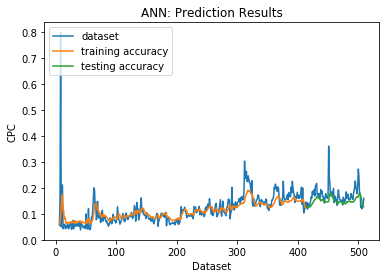

In [10]:
#----------plot the prediction result
# shift train predictions for plotting
time_prediction = 7
train_predict_plot = np.zeros((len_dataset, 1))
train_predict_plot[:, :] = np.nan
train_predict_plot[time_prediction-1:len(train_predict)+time_prediction-1, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.zeros((len_dataset, 1))
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + time_prediction-1:, :] = test_predict

# plot baseline and predictions
plot_dataset = np.zeros((len_dataset, 1))
plot_dataset[:,:] = np.nan
plot_dataset[time_prediction-1:] = y_label
plt.plot(plot_dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.title('ANN: Prediction Results')
plt.ylabel('CPC')
plt.xlabel('Dataset')
plt.legend(['dataset', 'training accuracy', 'testing accuracy'], loc='upper left')
plt.show()

# Forecasting

In [11]:
#compute the foc
forecast, inp, predict = np.array([]), .0, .0
adding = 7

for i in range(time_prediction+adding):
    if i > 0: inp = np.concatenate([inp[-1,1:], predict[0] ]).reshape((1,time_prediction-1) )
    else: inp = np.concatenate([trainX[-1,1:], train_predict[-1]]).reshape((1,time_prediction-1) )
    predict = model.predict(inp)
    forecast = np.append(forecast, predict)

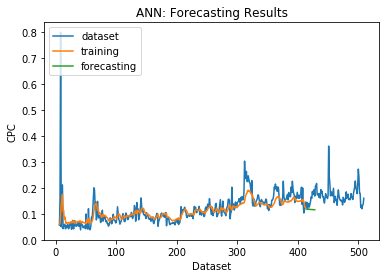

In [12]:
#------------plot the forecasting result
plot_dataset = np.zeros((len_dataset, 1))
plot_dataset[:,:] = np.nan
plot_dataset[time_prediction-1:] = y_label
plt.plot(plot_dataset)

# shift test forecasting for plotting
forecast = forecast.reshape((time_prediction+adding,1))
forecast_plot = np.zeros((len_dataset, 1))
forecast_plot [:, :] = np.nan
forecast_plot [len(train_predict) + time_prediction:len(train_predict) + (2*time_prediction)+adding, :] = forecast
plt.plot(train_predict_plot)
plt.plot(forecast_plot)
plt.title('ANN: Forecasting Results')
plt.ylabel('CPC')
plt.xlabel('Dataset')
plt.legend(['dataset', 'training', 'forecasting'], loc='upper left')
plt.show()

In [13]:
forecast_result = regression_to_class(forecast)
test_data = regression_to_class(testY)
test_data = test_data.reshape(-1,1)
print (np.append(forecast_result[:14], test_data[:14].reshape(-1,1), axis =1))

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]]


# Save the trained NN-weights, and Load it to Predict the Input

Save the model's weights

In [ ]:
#model_json = lstm_model.to_json() # for LSTM
model_json = model.to_json() # for ANN
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Load and compile the model's weights

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# compile loaded model
optimizer_value = 0.0001
adam = Adam(decay = optimizer_value*0.05, lr=optimizer_value)
loaded_model.compile(loss="mean_squared_error", optimizer = adam)

Re-predict using the loaded model

In [ ]:
train_predict_loaded_model = model.predict(trainX)
test_predict_loaded_model = model.predict(testX)
print(train_predict_loaded_model.shape, test_predict_loaded_model.shape)

# Fine Tuning

Fine-Tuning process, it is used to find the most effective parameters for the model that we built

In [ ]:
#------------fine tuning ANN using gridSearch
model = KerasRegressor(build_fn=build_model)
parameters = {'batch_size' : [128, 256, 512], 
                'nb_epoch' : [100, 1000, 10000 ],
                'optimizer_value': [0.01, 0.001, 0.0001]}#,
#                'hidden_layer' : [1, 3, 5]}
fine_tune = GridSearchCV(estimator=model, 
                         param_grid=parameters,
                         cv = 10)
fine_tune_result = fine_tune.fit(trainX, trainY)
best_params = fine_tune_result.best_params_
best_accuracy = fine_tune_result.best_score_

In [ ]:
#ANN: print the loss and the best parameters
means = fine_tune_result.cv_results_['mean_test_score']
stds = fine_tune_result.cv_results_['std_test_score']
params = fine_tune_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))